In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/creditcard.csv")

In [3]:
# Display top 5 rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data.shape

(55551, 31)

In [5]:
data.isnull().sum().sum()

16

In [6]:
data=data.dropna()

In [7]:
data.shape

(55550, 31)

In [8]:
data['Class'].value_counts()

,count
Class,
0.0,55394
1.0,156


In [9]:
from sklearn.preprocessing import StandardScaler  # we have applied this to make the data more standarized

In [10]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [11]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.213714,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.358110,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.105095,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.112060,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.096191,0.0


In [12]:
X = data.drop('Class',axis=1)
y = data['Class']

# Data is imbalanced,further so we are making it balanced.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=0)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38885, 30), (38885,), (16665, 30), (16665,))

In [15]:
y_train.value_counts()

,count
Class,
0.0,38781
1.0,104


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()
model.fit(X_train_us, y_train_us)
X_test_prediction = model.predict(X_test)
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     16613
         1.0       0.05      0.96      0.09        52

    accuracy                           0.94     16665
   macro avg       0.52      0.95      0.53     16665
weighted avg       1.00      0.94      0.97     16665



# because imbalance datasets are not heavy impact ensembling technique where decision tree are actually used.

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
!pip install imblearn

In [41]:
from imblearn.under_sampling import NearMiss

In [42]:
# Implementing Undersampling for Handling Imbalanced
nm = NearMiss()
X_train_us,y_train_us=nm.fit_resample(X_train,y_train)

In [43]:
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_us)))

The number of classes before fitCounter({0.0: 38781, 1.0: 104})
The number of classes after fitCounter({0.0: 104, 1.0: 104})


In [44]:
rf.fit(X_train_us,y_train_us)

RandomForestClassifier()

In [45]:
y_pred_us = rf.predict(X_test)

In [46]:
print(confusion_matrix(y_test,y_pred_us))

[[16351   262]
 [    2    50]]


In [47]:
print(classification_report(y_test,y_pred_us))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     16613
         1.0       0.16      0.96      0.27        52

    accuracy                           0.98     16665
   macro avg       0.58      0.97      0.63     16665
weighted avg       1.00      0.98      0.99     16665



here we can say that 1 class belongs to fraud and for fraud we are getting 0.2 precision value,which is very less and f-1 score is also very less


In [48]:
list1 = []
for i in range(1,16666):
  list1.append(i)

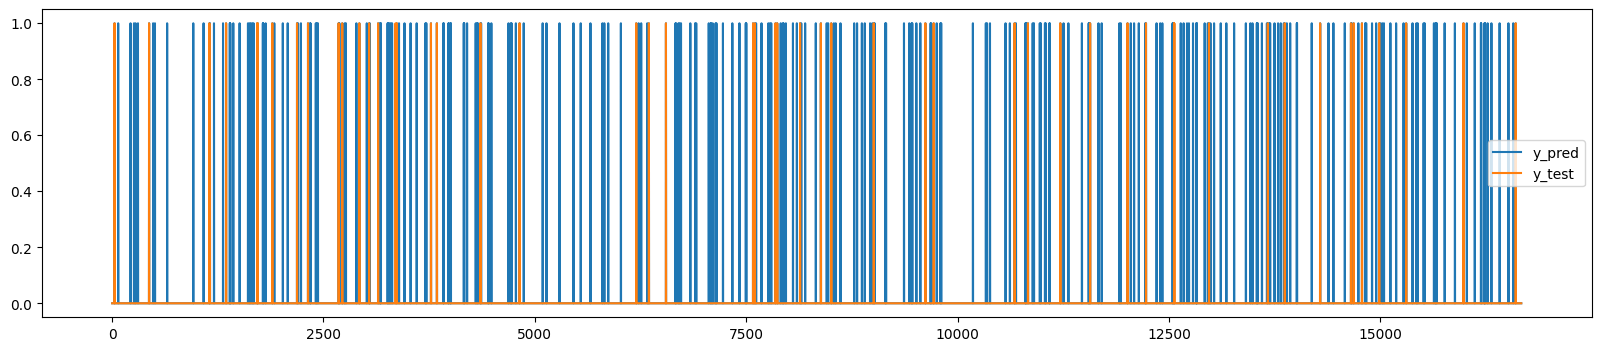

In [49]:
plt.figure(figsize=(20,4))
plt.plot(list1, y_pred_us, label = "y_pred")
plt.plot(list1, y_test, label = "y_test")
plt.legend()
plt.show()

Oversampling

In [50]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_os)))

The number of classes before fitCounter({0.0: 38781, 1.0: 104})
The number of classes after fitCounter({0.0: 38781, 1.0: 38781})


In [63]:
model = LogisticRegression()
model.fit(X_train_os,y_train_os)
X_test_prediction = model.predict(X_test)
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     16613
         1.0       0.08      0.96      0.14        52

    accuracy                           0.96     16665
   macro avg       0.54      0.96      0.56     16665
weighted avg       1.00      0.96      0.98     16665



Randomforest

In [51]:
rf.fit(X_train_os,y_train_os)
y_pred_os = rf.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred_os))

[[16605     8]
 [    8    44]]


In [67]:
print(classification_report(y_test,y_pred_os))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16613
         1.0       0.85      0.85      0.85        52

    accuracy                           1.00     16665
   macro avg       0.92      0.92      0.92     16665
weighted avg       1.00      1.00      1.00     16665



here we can say that 1 class belongs to fraud and for fraud we are getting 0.85 precision value and recall value 0.85,which is good and f-1 score of 0.85

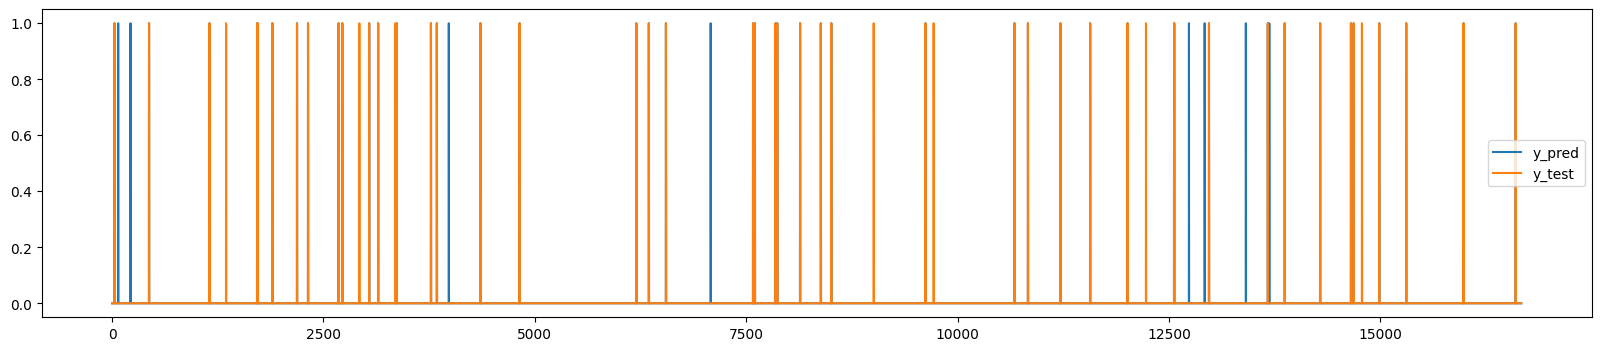

In [54]:
plt.figure(figsize=(20,4))
plt.plot(list1, y_pred_os, label = "y_pred")
plt.plot(list1, y_test, label = "y_test")
plt.legend()
plt.show()

Smote

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE()
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_s)))

The number of classes before fitCounter({0.0: 38781, 1.0: 104})
The number of classes after fitCounter({0.0: 38781, 1.0: 38781})


In [68]:
model = LogisticRegression()
model.fit(X_train_s, y_train_s)
X_test_prediction = model.predict(X_test)
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     16613
         1.0       0.23      0.96      0.37        52

    accuracy                           0.99     16665
   macro avg       0.61      0.98      0.68     16665
weighted avg       1.00      0.99      0.99     16665



In [57]:
rf.fit(X_train_s,y_train_s)
y_pred_s = rf.predict(X_test)

In [58]:
print(confusion_matrix(y_test,y_pred_s))

[[16604     9]
 [    6    46]]


In [59]:
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16613
         1.0       0.84      0.88      0.86        52

    accuracy                           1.00     16665
   macro avg       0.92      0.94      0.93     16665
weighted avg       1.00      1.00      1.00     16665



here we can say that 1 class belongs to fraud and for fraud we are getting 0.84 precision value and recall value 0.88,which is very high in comparision of all three with f-1 score of 0.86

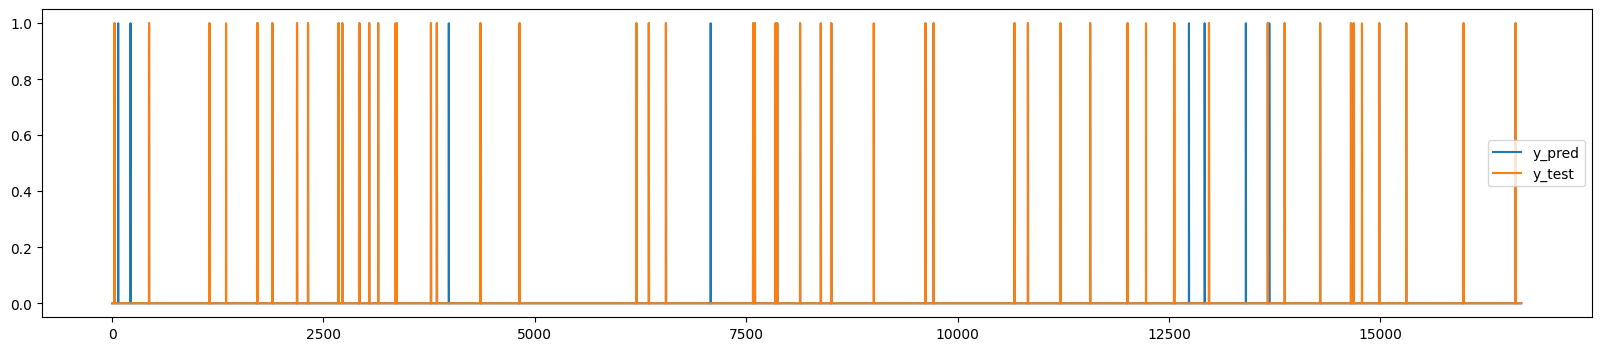

In [60]:
plt.figure(figsize=(20,4))
plt.plot(list1, y_pred_s, label = "y_pred")
plt.plot(list1, y_test, label = "y_test")
plt.legend()
plt.show()
